In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score 

irisData = load_iris()

#create feature and target arrays
X = irisData.data  #x, modelin eğitilmesi ve test edilmesi için kullanılan giriş verilerini(özellik, feature)(çanak yaprağı uzunluğu, çanak yaprağı genişliği, taç yaprağı uzunluğu, taç yaprağı genişliği)
y = irisData.target #y ise her giriş verisinin doğru çıktısını (etiketini) temsil eder. (Setosa, Versicolor ve Virginica.) (0, 1, 2 ile temsil edilir.)

#split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, shuffle=True)

knn = KNeighborsClassifier(n_neighbors = 7)  #metric='manhattan' yapınca mesafe ölçüm hesabını, score 1 oluyor. n_neighbors = 3 veya 35 vs yapınca da score 1 oluyor.
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

y_pred = knn.predict(X_test)

0.9666666666666667


In [3]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

en iyi k değerimiz ne? inceleyelim (Model Tuning)

In [5]:
precision = precision_score(y_test, y_pred, average='macro')
print(f'Precision değeri: {precision}')

Precision değeri: 0.9722222222222222


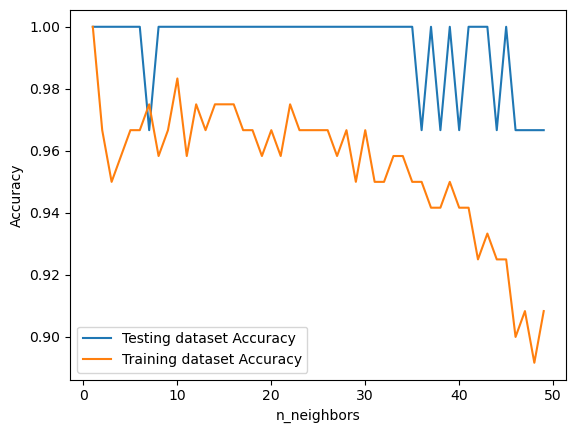

En yüksek başarım 1.0


In [6]:
neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#loop over k values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    #compute training and test data accuracy
    train_accuracy[i]=knn.score(X_train, y_train)
    test_accuracy[i]=knn.score(X_test, y_test)

#generate plot
plt.plot(neighbors, test_accuracy, label="Testing dataset Accuracy")
plt.plot(neighbors, train_accuracy, label="Training dataset Accuracy")
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

print('En yüksek başarım', test_accuracy.max())

# yeni iris dataseti ile işlemler yapalım

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score 

iris = pd.read_csv('Iris.csv')
df = iris.copy()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
label_dict = {'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2}
df['ClassLabel']=df['Species'].map(label_dict)
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,ClassLabel
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


In [11]:
y = df['ClassLabel'].values
print(y)
print(y.shape[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
150


In [12]:
X = df[['PetalLengthCm', 'PetalWidthCm']].values
X.shape

(150, 2)

In [13]:
X[:5, :]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [14]:
#dataseti manuel shuffle (karıştır)
#normalde test train split zaten arka planda bu fonksiyonları yapıyor

y = df['ClassLabel'].values

indices = np.arange(y.shape[0])
rnd = np.random.RandomState(123)
shuffled_indices = rnd.permutation(indices)
shuffled_indices

X_shuffled, y_shuffled = X[shuffled_indices], y[shuffled_indices]

X_train, y_train = X_shuffled[:105], y_shuffled[:105]
X_test, y_test = X_shuffled[105:], y_shuffled[105:]

# SVM Algoritması

In [25]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
digits = load_digits()
X = digits.data
y = digits.target

In [20]:
svm_model = SVC(kernel = "linear")
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

#alttaki mavi yazılı bilgi blokunun çıkması için:
from sklearn import set_config
set_config(print_changed_only=False)
svm_model


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.95      0.95      0.95        19
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
kernel = ['linear', 'rbf', 'poly']
acc = np.empty(len(kernel))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

for i,k in enumerate(kernel):
    svm_model = SVC(kernel=k, C=1, gamma = 'scale')
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    acc[i] = accuracy_score(y_test, y_pred)
    print(acc[i])

print(acc)


0.9777777777777777
0.9861111111111112
0.9916666666666667
[0.97777778 0.98611111 0.99166667]


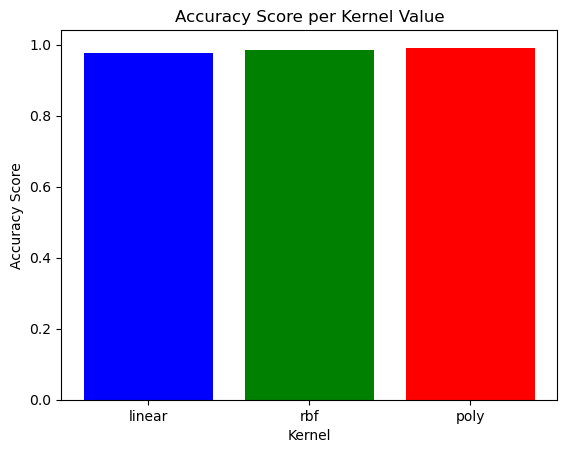

In [22]:
#kernel çeşitlerinin accuracy scoreları barplot çizimi
kernel = ['linear', 'rbf', 'poly']

plt.bar(kernel, acc, color=['blue', 'green', 'red'])
plt.title('Accuracy Score per Kernel Value') #loc title konumu verir.
plt.xlabel('Kernel')
plt.ylabel('Accuracy Score')

plt.show()

In [30]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm

#cm = confusion_matrix(y_test, y_pred)
#cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 39]])

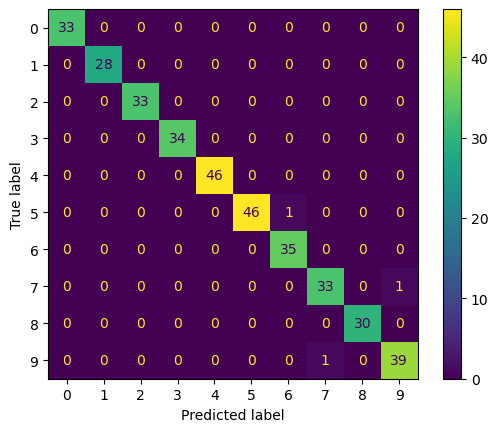

In [60]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0,1,2,3,4,5,6,7,8,9])
cm_display.plot()
plt.show()                                            

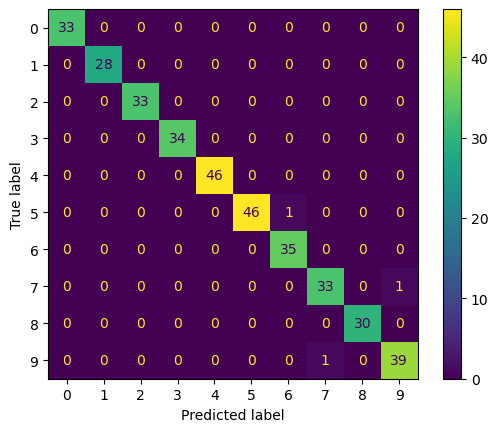

In [62]:
#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svm_model.classes_)
#cm_display.plot()
#plt.show()                                            

In [27]:
from sklearn import datasets
from sklearn.model_selection import KFold, cross_val_score

X, y = datasets.load_iris(return_X_y = True) #bu kodla datasetten, Iris veri seti yüklenir ve X değişkenine özellik matrisi, y değişkenine ise sınıf etiketleri atanır.

clf = SVC(kernel="linear")

k_folds = KFold(n_splits=5)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Val Score: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))
print(y)

Cross Val Score:  [1.         1.         0.86666667 1.         0.86666667]
Average CV Score:  0.9466666666666667
Number of CV Scores used in Average:  5
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
